In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# reading the csv file into a dataframe
data_df = pd.read_csv('Data_for_UCI_named.csv', encoding='latin-1')

In [4]:
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


# About the dataset
> It has 12 primary predictive features and two dependent variables.

> Predictive features:

> 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);

> 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);

> 'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

> Dependent variables:

> 'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);

> 'stabf': a categorical (binary) label ('stable' or 'unstable').

In [6]:
data_df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [7]:
data_df.nunique()

tau1     10000
tau2     10000
tau3     10000
tau4     10000
p1       10000
p2       10000
p3       10000
p4       10000
g1       10000
g2       10000
g3       10000
g4       10000
stab     10000
stabf        2
dtype: int64

In [8]:
# Drop the 'stab' column and keep 'stabf' as the target variable
data_df.drop('stab', axis=1, inplace=True)

In [9]:
# Convert categorical variables into binary values
stabf_binary = pd.get_dummies(data_df['stabf'], drop_first=True)

In [10]:
# Add binary values to original data
data_df = pd.concat([data_df, stabf_binary], axis=1)

In [11]:
# Drop original categorical variable
data_df.drop('stabf', axis=1, inplace=True)

In [12]:
# Rename new column containing binary to stab_bin
data_df.rename(columns={'unstable': 'stab_bin'}, inplace=True)

In [13]:
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab_bin
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


## Note
stable = 0
unstable = 1

In [14]:
# Split the data into train and test sets
X = data_df.drop('stab_bin', axis=1)
y = data_df['stab_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [15]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

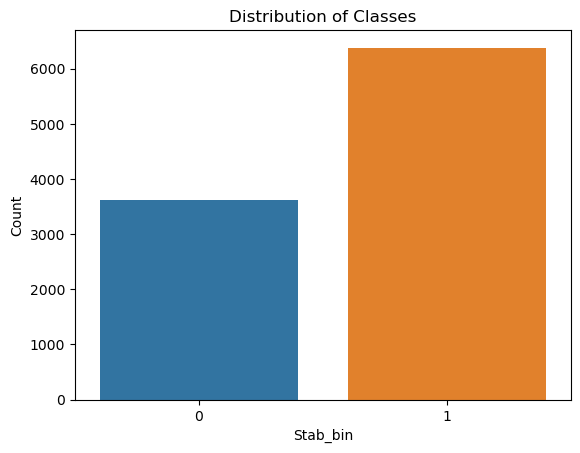

In [16]:
# check for the Target Variable Distribution
sns.countplot(data=data_df, x='stab_bin')
plt.title('Distribution of Classes')
plt.xlabel('Stab_bin')
plt.ylabel('Count')
plt.show()

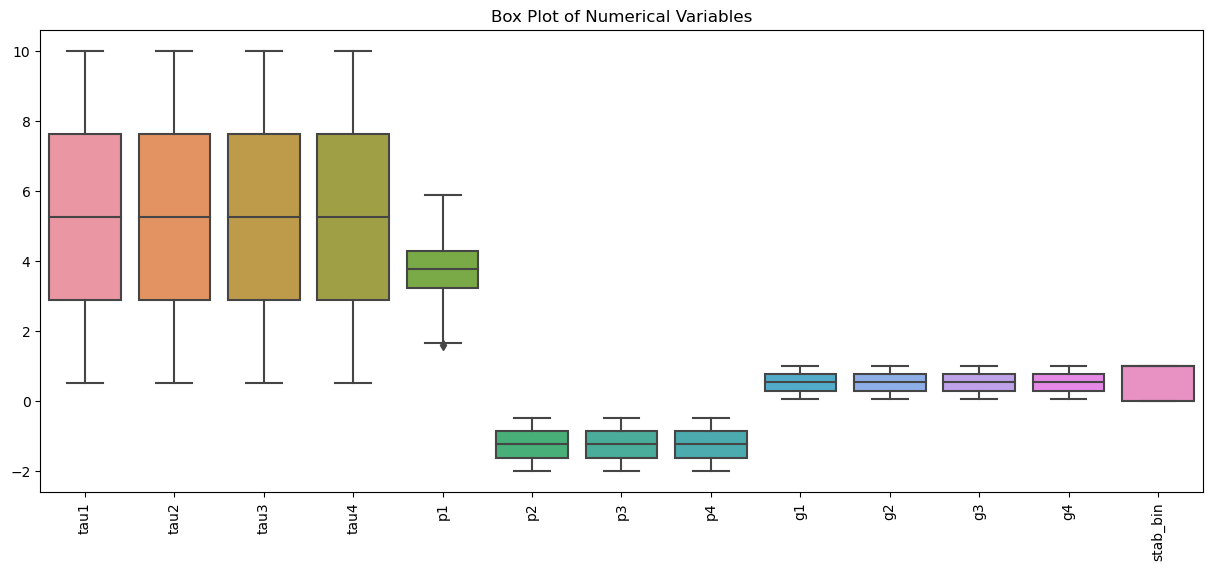

In [17]:
# check for the outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_df)
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=90)
plt.show()

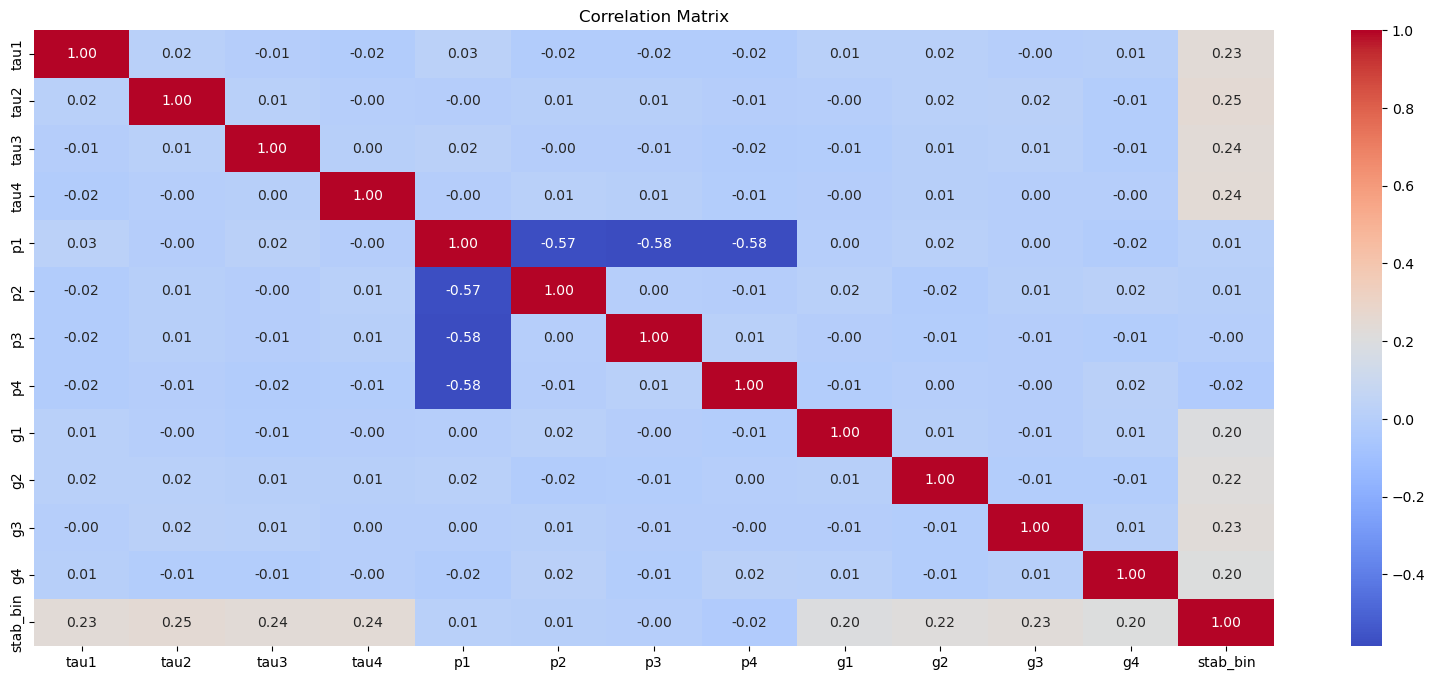

In [18]:
# check the correlation of the data
correlation_matrix = data_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

In [20]:
# Train Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=1)
et_classifier.fit(X_train_scaled, y_train)
et_predictions = et_classifier.predict(X_test_scaled)

In [21]:
# Train XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train_scaled, y_train)
xgb_predictions = xgb_classifier.predict(X_test_scaled)

In [22]:
# Train LightGBM Classifier
lgbm_classifier = LGBMClassifier(random_state=1)
lgbm_classifier.fit(X_train_scaled, y_train)
lgbm_predictions = lgbm_classifier.predict(X_test_scaled)

In [23]:
# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)


In [24]:
# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Extra Trees Accuracy:", et_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("LightGBM Accuracy:", lgbm_accuracy)

Random Forest Accuracy: 0.929
Extra Trees Accuracy: 0.928
XGBoost Accuracy: 0.9455
LightGBM Accuracy: 0.9395


In [25]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    return accuracy, report

In [26]:
# Define the models
rf_classifier = RandomForestClassifier(random_state=1)
et_classifier = ExtraTreesClassifier(random_state=1)
xgb_classifier = XGBClassifier(random_state=1)
lgbm_classifier = LGBMClassifier(random_state=1)

In [27]:
# Evaluate each model
rf_accuracy, rf_report = evaluate_model(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)
et_accuracy, et_report = evaluate_model(et_classifier, X_train_scaled, y_train, X_test_scaled, y_test)
xgb_accuracy, xgb_report = evaluate_model(xgb_classifier, X_train_scaled, y_train, X_test_scaled, y_test)
lgbm_accuracy, lgbm_report = evaluate_model(lgbm_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


In [28]:
# Print the results
print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(rf_report)
print()

print("Extra Trees:")
print("Accuracy:", et_accuracy)
print("Classification Report:")
print(et_report)
print()

print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print("Classification Report:")
print(xgb_report)
print()

print("LightGBM:")
print("Accuracy:", lgbm_accuracy)
print("Classification Report:")
print(lgbm_report)

Random Forest:
Accuracy: 0.929
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000


Extra Trees:
Accuracy: 0.928
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       712
           1       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000


XGBoost:
Accuracy: 0.9455
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       712
           1       0.95      0.97      0.96      1288

    accuracy             

In [29]:
# Create a dictionary to store the classification reports for each model
classification_reports = {}
for model_name, model in [('Random Forest classifier', rf_classifier), ('Gradient Boosting', xgb_classifier), ('Decision Tree', et_classifier), ('SVC', lgbm_classifier)]:
    y_pred = model.predict(X_test_scaled)
    classification_reports[model_name] = classification_report(y_test, y_pred)

# Create a DataFrame to store the classification reports
df = pd.DataFrame.from_dict(classification_reports, orient='index', columns=['Classification Report'])

# Add a column for accuracy
df['Accuracy'] = [accuracy_score(y_test, rf_classifier.predict(X_test_scaled)), accuracy_score(y_test, xgb_classifier.predict(X_test_scaled)), accuracy_score(y_test, et_classifier.predict(X_test_scaled)), accuracy_score(y_test, lgbm_classifier.predict(X_test_scaled))]

# Sort the DataFrame by accuracy in descending order
df = df.sort_values(by='Accuracy', ascending=False)

# Highlight the row with the best accuracy
styled_df = df.style.highlight_max(subset='Accuracy', color='lightgreen')

# Display the styled DataFrame
display(styled_df)


,Classification Report,Accuracy
Gradient Boosting,precision recall f1-score support 0 0.94 0.91 0.92 712 1 0.95 0.97 0.96 1288 accuracy 0.95 2000 macro avg 0.94 0.94 0.94 2000 weighted avg 0.95 0.95 0.95 2000,0.945500
SVC,precision recall f1-score support 0 0.93 0.90 0.91 712 1 0.95 0.96 0.95 1288 accuracy 0.94 2000 macro avg 0.94 0.93 0.93 2000 weighted avg 0.94 0.94 0.94 2000,0.939500
Random Forest classifier,precision recall f1-score support 0 0.92 0.88 0.90 712 1 0.93 0.96 0.95 1288 accuracy 0.93 2000 macro avg 0.93 0.92 0.92 2000 weighted avg 0.93 0.93 0.93 2000,0.929000
Decision Tree,precision recall f1-score support 0 0.94 0.85 0.89 712 1 0.92 0.97 0.95 1288 accuracy 0.93 2000 macro avg 0.93 0.91 0.92 2000 weighted avg 0.93 0.93 0.93 2000,0.928000


In [30]:
# Train an ExtraTreesClassifier model
et_classifier = ExtraTreesClassifier(random_state=1)
et_classifier.fit(X_train_scaled, y_train)

# Get the feature importance scores
importances = et_classifier.feature_importances_

# Create a pandas dataframe from the feature importances
df_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance score in descending order
df_importances = df_importances.sort_values('Importance', ascending=False)

# Print the dataframe
print(df_importances)

   Feature  Importance
1     tau2    0.118445
0     tau1    0.117397
3     tau4    0.115466
2     tau3    0.113169
10      g3    0.096883
11      g4    0.094019
9       g2    0.093676
8       g1    0.089783
6       p3    0.040706
7       p4    0.040579
5       p2    0.040371
4       p1    0.039507


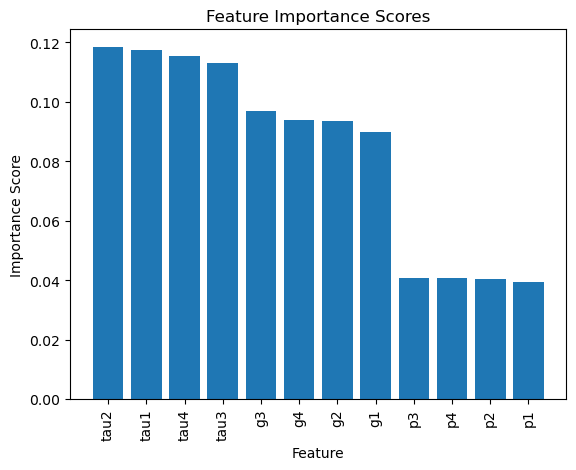

In [31]:
import matplotlib.pyplot as plt

# Plot the feature importance scores
plt.bar(df_importances['Feature'], df_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create an ExtraTreesClassifier object
et_classifier = ExtraTreesClassifier(random_state=1)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=et_classifier,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\user\anaconda3\envs\myanal\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\myanal\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\envs\myanal\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\envs\myanal\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


In [36]:
# Train a new ExtraTreesClassifier model with the best hyperparameters
et_classifier_new = ExtraTreesClassifier(n_estimators=100,
                                          min_samples_split=10,
                                          min_samples_leaf=2,
                                          max_features='sqrt',
                                          max_depth=20,
                                          random_state=1)
et_classifier_new.fit(X_train_scaled, y_train)

# Evaluate the accuracy of the new model
accuracy_new = et_classifier_new.score(X_test_scaled, y_test)

# Print the accuracy of the new model
print('Accuracy of the new optimal model:', accuracy_new)


Accuracy of the new optimal model: 0.9265
